In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import RMSprop
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import random

In [0]:
os.chdir('/content/gdrive/My Drive/thesis')

In [0]:
data = pd.read_pickle('master_dataset_24112019.pkl')
target = data['dk2'].shift(-1)[0: -1]
features = data.iloc[0: -1, :]
target_fitter = np.array(target).reshape(-1, 1)

In [0]:
data = pd.read_pickle('master_dataset_15102019.pkl')
target = data['dk2'].shift(-1)[0: -1]
features = data.iloc[0: -1, :]
target_fitter = np.array(target).reshape(-1, 1)

In [0]:
imp_mean2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


In [0]:
imp_mean2.fit(target_fitter)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [0]:
imp_target = imp_mean2.transform(target_fitter)

In [0]:
qs = [-100]
for i in range(1, 101):
  q = i
  qs.append(np.percentile(imp_target, q))

In [0]:
new_feature = features['dk2'].copy()

In [0]:
new_feature = pd.DataFrame(new_feature, index=target.index)
new_feature.columns = ['price']

In [0]:
def is_in_range(x, lower, upper, val):
  if lower < x <= upper:
    return val
  else:
    return 0

In [0]:
def is_in_range(x, lower, upper, val):
  if lower < x <= upper:
    return val
  else:
    return 0

  
ss = dict()
for i, (lower, upper) in enumerate(zip(qs[:-1], qs[1:])):
  print(lower, upper)
  s = new_feature['price'].apply(lambda row: is_in_range(row, lower, upper, i))
  ss[i] = s

-100 23.595
23.595 57.21
57.21 72.66
72.66 84.81
84.81 97.44
97.44 111.725
111.725 122.9775
122.9775 133.72
133.72 141.81
141.81 148.195
148.195 152.64
152.64 157.26
157.26 161.6
161.6 165.305
165.305 169.24499999999998
169.24499999999998 173.27
173.27 176.8
176.8 179.73
179.73 182.85
182.85 185.63
185.63 187.82
187.82 190.755
190.755 193.66
193.66 196.24
196.24 199.2875
199.2875 201.73
201.73 204.74
204.74 207.47
207.47 209.55
209.55 211.885
211.885 214.15
214.15 216.05
216.05 217.8775
217.8775 219.75
219.75 221.56
221.56 223.24
223.24 224.69
224.69 226.475
226.475 228.4
228.4 230.05
230.05 231.5875
231.5875 233.55
233.55 235.35
235.35 237.29
237.29 238.85
238.85 240.6
240.6 242.6025
242.6025 244.66
244.66 246.27
246.27 248.42
248.42 250.74
250.74 253.02
253.02 255.20749999999998
255.20749999999998 257.93
257.93 260.4125
260.4125 262.38
262.38 265.1375
265.1375 267.765
267.765 269.9725
269.9725 272.81
272.81 275.4575
275.4575 277.85
277.85 280.66
280.66 283.18
283.18 285.72
285.72 288

In [0]:
_df = pd.DataFrame(ss)

In [0]:
features['price_bin'] = _df.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
for feature in features.columns:
  print(feature)

de
dk1
dk2
no2
se3
se4
system
CentralProd_dk1
ElectricBoilerCon_dk1
ExchangeContinent_dk1
ExchangeGreatBelt_dk1
ExchangeNordicCountries_dk1
GrossCon_dk1
LocalPowerProd_dk1
NetCon_dk1
OnshoreWindPower_dk1
SolarPowerProd_dk1
CentralProd_dk2
ElectricBoilerCon_dk2
ExchangeContinent_dk2
ExchangeNordicCountries_dk2
GrossCon_dk2
LocalPowerProd_dk2
NetCon_dk2
OnshoreWindPower_dk2
SolarPowerProd_dk2
sun
temp
wind
hour
weekday
price_bin


In [0]:
#features.to_pickle('master_dataset_15112019.pkl')

In [0]:
imp_mean1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean1.fit(features)
imp_features = imp_mean1.transform(features)

In [0]:
train_split = 0.9
num_train = int(train_split * len(features))
num_test = len(features) - num_train

In [0]:
x_train = features.iloc[0:num_train , :]
x_test = features.iloc[num_train+1: , :]

try:
  y_train = target.iloc[0:num_train , :]
  y_test = target.iloc[num_train+1: , :]
except:
  y_train = target_fitter[0:num_train]
  y_test = target_fitter[num_train+1:]

In [0]:
x_train = imp_mean1.transform(x_train)
x_test = imp_mean1.transform(x_test)

y_train = imp_mean2.transform(y_train)
y_test = imp_mean2.transform(y_test)

In [0]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)

In [0]:
x_test_scaled = x_scaler.transform(x_test)

In [0]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [0]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training data
    """
    
    num_x_signals = features.shape[1]
    num_y_signals = 1
    
    # infinite loop
    while True:
        # Allocate a new array for the batch of input signals
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)
        
        # Allocate a new array for the batch of output signals 
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)
        
        # Fill the batch with random sequences of data
        for i in range(batch_size):
            # Get a random start_index
            # This points somewhere in the training data
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequence of data starting from this index
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)

In [0]:
batch_size = 256
sequence_length = 24 * 7 * 8

In [0]:
generator = batch_generator(batch_size=batch_size, sequence_length=sequence_length)

In [0]:
x_batch, y_batch = next(generator)

In [0]:
x_batch.shape ,y_batch.shape

((256, 1344, 32), (256, 1344, 1))

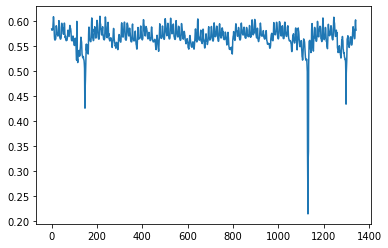

In [0]:
batch = 0 
signal = 0
seq = x_batch[batch , : , signal]
plt.plot(seq)

In [0]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [0]:
MODEL_NAME = 'regression_clipped_extremes_pyramid_16112019'

In [0]:
model = Sequential()
model.add(LSTM(units=100,
               input_shape=(None, x_train.shape[1],),
               return_sequences=True,
               dropout=0.2,
               recurrent_dropout=0.5))
model.add(LSTM(units=30,
               return_sequences=True,
               dropout=0.2,
               recurrent_dropout=0.5))
model.add(LSTM(units=20,
               return_sequences=True,
               dropout=0.2,
               recurrent_dropout=0.5))

model.add(Dense(y_train.shape[1], activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
  warmup_steps = 30

In [0]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the mean squared error between y_true and y_pred but ignores the warmup-period of the sequence,
    as there is not yet enough data to make serious predictions.
    """
    
    # The shape of both input tensors are 
    # (batch_size, sequence_length, num_y_signals)
    
    # Ignore the warm-up period by taking slices of the tensors
    y_true_slice = y_true[: , warmup_steps: , :]
    y_pred_slice = y_pred[: , warmup_steps: , :]
    
    # The sliced tensors have the shape (batch_size, sequence_length - warmup_length, num_y_signals)
    
    # Calculate the MSE loss for each value pair
    #loss = tf.losses.mean_squared_error(y_true_slice, y_pred_slice)
    #loss = tf.losses.softmax_cross_entropy(y_true_slice, y_pred_slice)
    loss = tf.keras.losses.MSLE(y_true_slice, y_pred_slice)
    loss_mean = tf.reduce_mean(loss)
    
    return loss_mean

In [0]:
optimizer = RMSprop(lr=1e-3)

In [0]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [0]:
path_checkpoint = f'/content/gdrive/My Drive/thesis/{MODEL_NAME}.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=2,
                                       verbose=1)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5,
                                        verbose=1)

callback_tensorboard = TensorBoard(log_dir=f'/content/gdrive/My Drive/thesis/',
                                   histogram_freq=0,
                                   write_graph=False)


In [0]:
model.fit_generator(generator=generator,
                    epochs=60,
                    steps_per_epoch=50,
                    validation_data=validation_data,
                    callbacks=[callback_checkpoint, callback_reduce_lr, callback_early_stopping, callback_tensorboard])

Epoch 1/60
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
25/50 [==============>...............] - ETA: 3:35 - loss: 0.0121